# Diabetes Prediction Dataset

A valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes.

### Data Import and Pre-processing

In [191]:
import pandas as pd
# Set the option to display all columns
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [192]:
# Load the dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)


In [193]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [194]:
#To show total rows and columns
df.shape

(768, 9)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [196]:
# unique count on each column
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [197]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [198]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details and Visualization

In [200]:
#numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


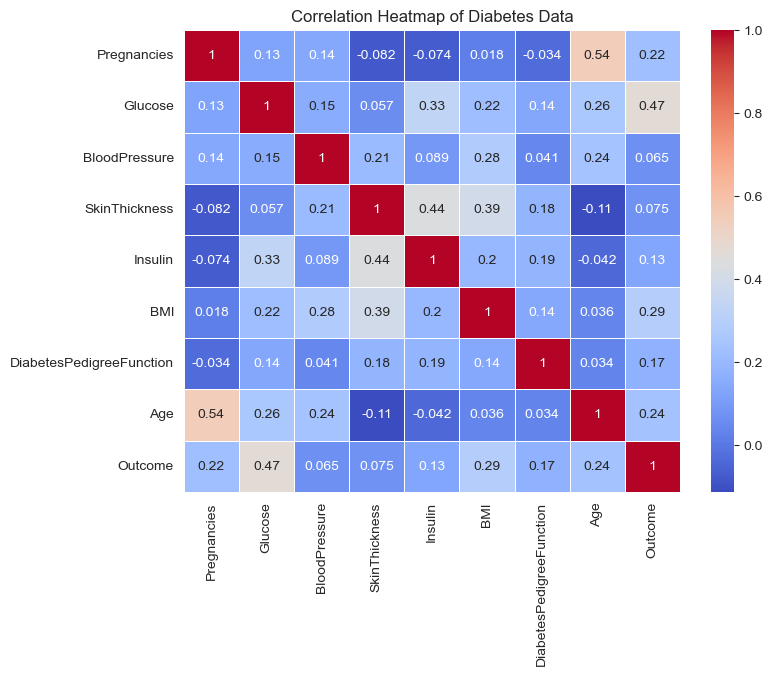

In [201]:
# Create a heatmap of corr matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Diabetes Data")
plt.show()

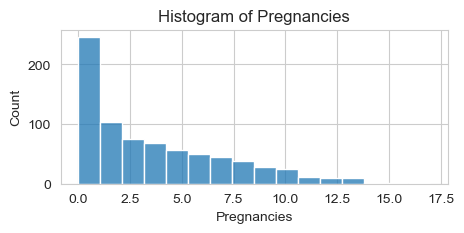

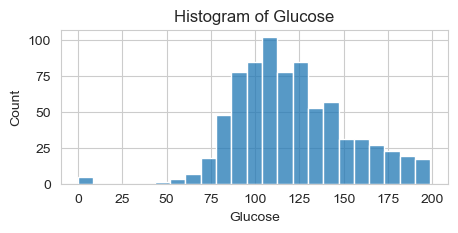

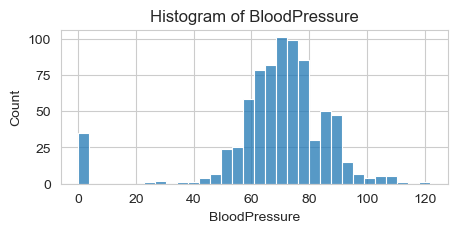

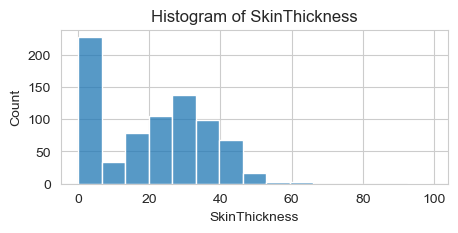

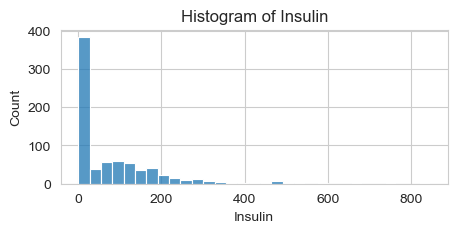

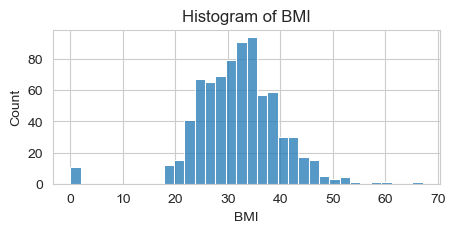

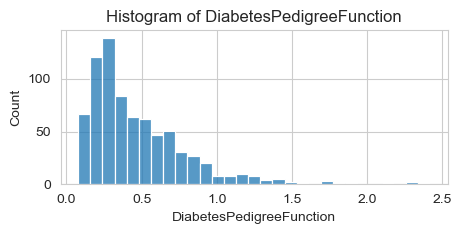

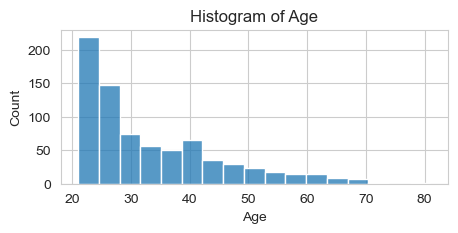

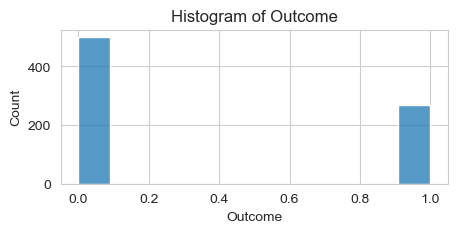

In [202]:
for x in df.columns:
    plt.figure(figsize=(5,2))
    sns.histplot(df[x])    
    # Add title
    plt.title(f'Histogram of {x}')   
    # Show the plot
    plt.show()

# Model Development and Evaluation

### Train-Test_split

In [261]:
# separate features and target var
x = df.drop(columns=['Outcome'],axis=1)
y = df.Outcome

In [263]:
#import library
from sklearn.model_selection import train_test_split

In [265]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=40) 

### Training Algorithm- LogisticRegression,  DecisionTreeClassifier,  RandomForestClassifier,  XGBClassifier

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [272]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200,random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
}

best_accuracy = 0

# Train models and evaluate
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}\n")
    
    # Print classification report
    print(classification_report(y_test, y_pred))

    print('----------------------------------------------------------------------\n')
    
    # Select the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model=model

# Output the best model
print(f"The best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}")

# Feature importance for the best model

Logistic Regression Accuracy: 0.73

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       142
           1       0.70      0.51      0.59        89

    accuracy                           0.73       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231

----------------------------------------------------------------------

Decision Tree Accuracy: 0.71

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       142
           1       0.63      0.58      0.61        89

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231

----------------------------------------------------------------------

Random Forest Accuracy: 0.79

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       1

In [212]:
# The best model is: Random Forest with an accuracy of 0.79
best_model

RandomForestClassifier(n_estimators=200, random_state=42)

###  Feature Importance Analysis

Text(0, 0.5, 'Features')

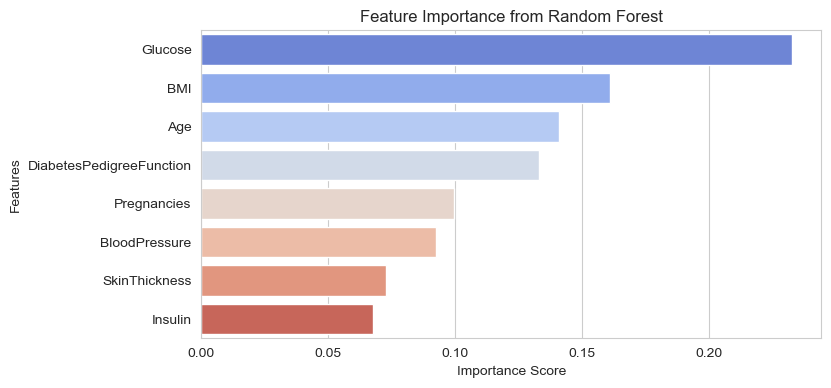

In [277]:
# Feature_Importances 
importances = best_model.feature_importances_
feature_names = x.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index, palette='coolwarm')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')  


### Key Findings from the Feature Importance Analysis
* Glucose is the most significant predictor of diabetes, indicating its crucial role in disease development.
* BMI and Age are also important factors influencing diabetes risk.
* Other features such as Pregnancies, BloodPressure, SkinThickness, Insulin, and degreeFunction contribute to the model's predictions.
* The findings align with general understanding of diabetes risk factors, emphasizing the importance of healthy blood sugar levels, weight management, and a balanced lifestyle.

### Sample Data to the Classifier

In [293]:
#  Generate random indices based on the DataFrame length
num_samples = 5 # Change this based on how many samples you want
rand_indices = np.random.choice(df.index, size=num_samples, replace=False)
#  Safely access the sampled data
test_sample_1 = df.loc[rand_indices]
test_sample_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
649,0,107,60,25,0,26.4,0.133,23,0
494,3,80,0,0,0,0.0,0.174,22,0
148,5,147,78,0,0,33.7,0.218,65,0
80,3,113,44,13,0,22.4,0.140,22,0
450,1,82,64,13,95,21.2,0.415,23,0


In [295]:

output=best_model.predict(test_sample_1[feature_names])
test_sample_1['Predicted_Outcome']= output
test_sample_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_Outcome
649,0,107,60,25,0,26.4,0.133,23,0,0
494,3,80,0,0,0,0.0,0.174,22,0,0
148,5,147,78,0,0,33.7,0.218,65,0,0
80,3,113,44,13,0,22.4,0.140,22,0,0
450,1,82,64,13,95,21.2,0.415,23,0,0
